# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder


In [55]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)


In [56]:
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

print(data)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [57]:
train, test = train_test_split(data, test_size=0.2, random_state=42,stratify=data['smoker'])  # 80% entrenamiento y 20% test

In [58]:
print('Datos de Entrenamiento:', train.shape[0])
print('Datos de Test:', test.shape[0])


Datos de Entrenamiento: 1070
Datos de Test: 268


In [59]:
X_train = train.drop('charges',axis = 1)
y_train = train['charges']

In [60]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [61]:
X_test = test.drop('charges',axis = 1)
y_test = test['charges']

In [62]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

## Implementación manual de la regresión con gradiente descendente

In [157]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [158]:
def train_regression(X_train, y_train, X_test, y_test, lr=0.01, epochs=1000):

    b = np.random.rand()  
    w = np.random.rand(X_train.shape[1])  
    n = len(X_train)  

    train_loss_per_epoch = []
    test_loss_per_epoch = []

    # Ciclo de entrenamiento
    for _ in range(epochs):
        # Calcular predicciones usando el producto punto (X_train . w) + b
        y_pred = np.dot(X_train, w) + b  # Producto punto de X_train y w, luego sumar el sesgo b

        # Calcular el costo en entrenamiento (Mean Squared Error)
        train_loss = cost_function(y_train, y_pred)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes con respecto a b y w
        gradient_b = (-2 / n) * np.sum(y_train - y_pred)  # Gradiente con respecto al sesgo
        gradient_w = (-2 / n) * np.dot(X_train.T, (y_train - y_pred))  # Gradiente con respecto a los pesos

        # Actualizar parámetros (sesgo y pesos)
        b -= lr * gradient_b
        w -= lr * gradient_w

        # Calcular el costo en el conjunto de validación
        y_pred_test = np.dot(X_test, w) + b  # Predicciones para el conjunto de validación
        test_loss = cost_function(y_test, y_pred_test)
        test_loss_per_epoch.append(test_loss)

    return w, b, train_loss_per_epoch, test_loss_per_epoch

In [173]:
# Hiperparámetros
lr = 1e-4
epochs = 200000

# Entrenar el modelo
w, b, train_loss_per_epoch, test_loss_per_epoch = train_regression(X_train, y_train, X_test, y_test, lr=lr, epochs=epochs)

Tras probar con hasta 1kk de epochs vemos que con 0,2kk ya no vale merece la pena seguir iterando.

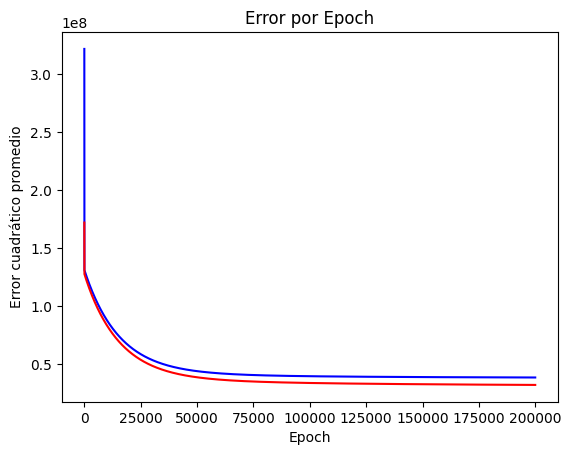

In [174]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), test_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

In [175]:
# Realizar predicciones en test
y_pred = np.dot (X_test, w) + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print(cost)


31974098.196778703


In [176]:
# Calcular las métricas obtenidas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 31974098.196778703
MAE en el conjunto de test: 3834.318140136761
R^2 en el conjunto de test: 0.7832750180559127
MAPE en el conjunto de test: 0.37262066737315475
